In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import keras
import sklearn


In [13]:
b=pd.read_csv("/content/bank csv.csv")

In [14]:
b.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,no


In [15]:
print(b.isnull().sum())
print(b.dropna)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
y              0
dtype: int64
<bound method DataFrame.dropna of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree  

In [16]:
print(b.shape)
print(b["loan"].value_counts())

(41188, 11)
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64


In [17]:
b.value_counts()

age  job         marital  education          default  housing  loan  contact    month  day_of_week  y  
32   admin.      single   university.degree  no       yes      no    cellular   aug    thu          no     12
34   admin.      single   university.degree  no       yes      no    cellular   aug    mon          no     11
31   admin.      single   university.degree  no       yes      no    cellular   aug    wed          no     11
29   admin.      single   university.degree  no       yes      no    cellular   aug    fri          no     11
33   admin.      single   university.degree  no       no       no    cellular   aug    wed          no     10
                                                                                                           ..
35   management  single   unknown            no       no       no    telephone  jun    fri          yes     1
                          university.degree  unknown  yes      no    cellular   jul    thu          no      1
                                             no       yes      yes   cellular   nov    wed          no      1
                                                               no    telephone  jun    mon          no      1
39   admin.      single   university.degree  no       no       no    cellular   jul    tue          no      1
Name: count, Length: 34127, dtype: int64

In [18]:
b.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


In [19]:
b.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=b.select_dtypes(include=["object"]).columns
for i in col:
  b[i]=le.fit_transform(b[i])
b.head()





,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,56,3,1,0,0,0,0,1,6,1,0
1,57,7,1,3,1,0,0,1,6,1,0
2,37,7,1,3,0,2,0,1,6,1,0
3,40,0,1,1,0,0,0,1,6,1,0
4,56,7,1,3,0,0,2,1,6,1,0


<Axes: ylabel='Count'>

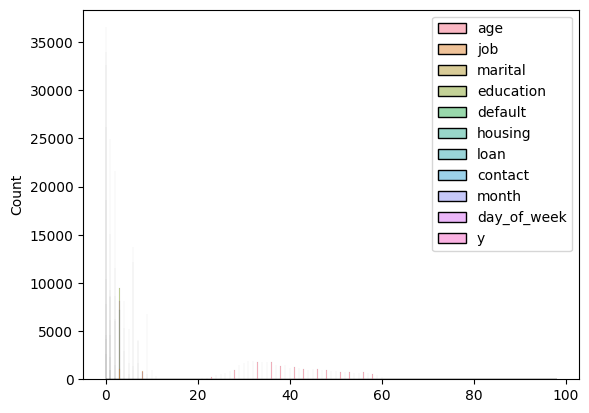

In [36]:
sns.histplot(data=b)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'job'}>,
        <Axes: title={'center': 'marital'}>],
       [<Axes: title={'center': 'education'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'contact'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day_of_week'}>,
        <Axes: title={'center': 'y'}>, <Axes: >]], dtype=object)

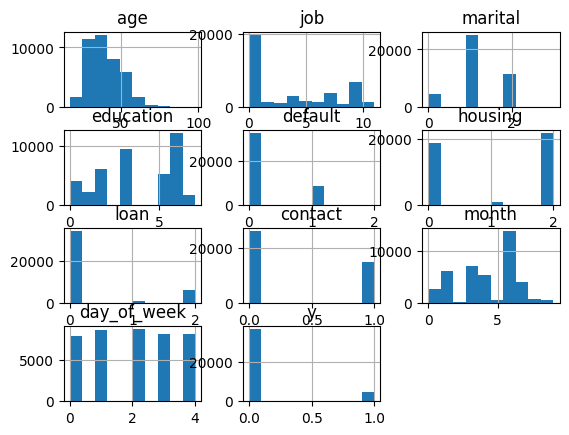

In [43]:
b.hist()

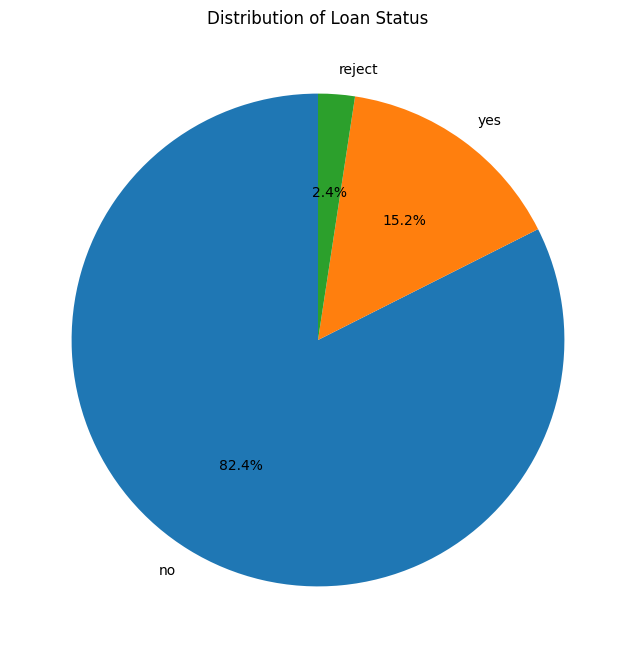

In [76]:

plt.figure(figsize=(8, 8))
labels=["no","yes","reject"]
b['loan'].value_counts().plot.pie(labels=labels,autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Loan Status')
plt.ylabel('') # Remove the y-label
plt.show()


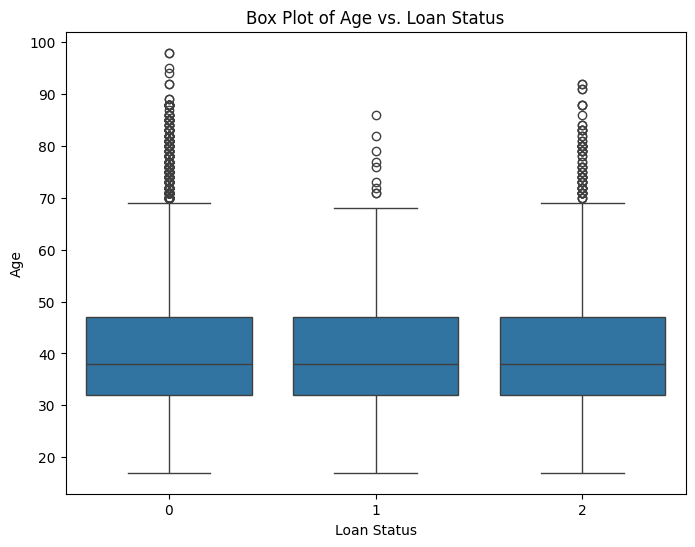

In [46]:
# prompt: build box plot

plt.figure(figsize=(8, 6))
sns.boxplot(x='loan', y='age', data=b)
plt.title('Box Plot of Age vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Age')
plt.show()


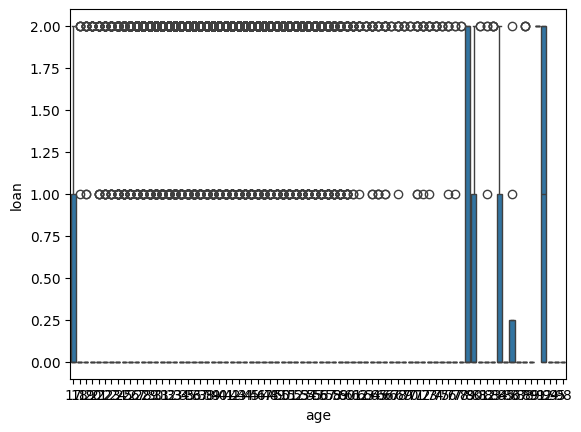

In [47]:
sns.boxplot(x="age",y="loan",data=b)
plt.show()

In [21]:
y=b["loan"]
x=b.drop("loan",axis=1)

In [22]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=42)

In [23]:
# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(12357, 3)
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(64,input_dim=x_train.shape[1],kernel_initializer="normal",activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid')) # Output layer (sigmoid for binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# adam=Adam(learning_rate==0.001)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7663 - loss: 0.6732 - val_accuracy: 0.8232 - val_loss: 0.6325
Epoch 2/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8253 - loss: 0.6365 - val_accuracy: 0.8232 - val_loss: 0.6563
Epoch 3/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8298 - loss: 0.6264 - val_accuracy: 0.8231 - val_loss: 0.6395
Epoch 4/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8276 - loss: 0.6313 - val_accuracy: 0.8232 - val_loss: 0.6335
Epoch 5/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8239 - loss: 0.6290 - val_accuracy: 0.8232 - val_loss: 0.6334
Epoch 6/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8267 - loss: 0.6306 - val_accuracy: 0.8232 - val_loss: 0.6320
Epoch 7/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8307 - loss: 0.6248 - val_accuracy: 0.8232 - val_loss: 0.6329
Epoch 8/10
387/387 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8244 - loss: 0.6324 - val_accuracy: 

In [25]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

None


In [26]:
model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=1)


Epoch 1/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8213 - loss: 0.6321
Epoch 2/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8291 - loss: 0.6248
Epoch 3/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8275 - loss: 0.6266
Epoch 4/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8250 - loss: 0.6279
Epoch 5/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8266 - loss: 0.6262
Epoch 6/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8294 - loss: 0.6218
Epoch 7/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8259 - loss: 0.6275
Epoch 8/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8186 - loss: 0.6355
Epoch 9/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8248 - loss: 0.6304
Epoch 10/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8253 - loss: 0.6268
Epoch 11/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8251 - loss: 0.6268
Epoch 12/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [27]:
y_train_binary=y_train.copy()
y_test_binary=y_test.copy()
y_train_binary[y_train_binary>0]=1
y_test_binary[y_test_binary>0]=1
print(y_train_binary[:20])

32884    1
3169     0
32206    0
9403     0
14020    0
17201    1
879      0
23757    0
10821    1
14355    1
32311    0
31850    0
13595    0
21871    0
16735    1
8040     0
14064    0
17688    1
15507    0
37480    0
Name: loan, dtype: int64


In [61]:
n_model = Sequential()
n_model.add(Dense(64,input_dim=x_train.shape[1],kernel_initializer="normal",activation='relu'))  # Input layer
n_model.add(Dense(32, kernel_initializer="normal",activation='relu'))  # Hidden layer
n_model.add(Dense(1, activation='softmax')) # Output layer (sigmoid for binary classification)

# Compile the model
n_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# adam=Adam(learning_rate==0.001)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Train the model
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
print(n_model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [63]:
# Train the model
n_model.fit(x_train, y_train_binary, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1726 - loss: 0.0000e+00
Epoch 2/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1764 - loss: 0.0000e+00
Epoch 3/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1692 - loss: 0.0000e+00
Epoch 4/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1737 - loss: 0.0000e+00
Epoch 5/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1704 - loss: 0.0000e+00
Epoch 6/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1745 - loss: 0.0000e+00
Epoch 7/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1791 - loss: 0.0000e+00
Epoch 8/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1683 - loss: 0.0000e+00
Epoch 9/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1782 - loss: 0.0000e+00
Epoch 10/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1705 - loss: 0.0000e+00
Epoch 11/50
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1751 - loss: 0.0000e+00
Epoch 12/50
387/387

In [69]:
binary_pred = np.round(n_model.predict(x_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(y_test_binary, binary_pred))
print(classification_report(y_test_binary, binary_pred))

901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Results for Binary Model
0.17682355797578994
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23733
           1       0.18      1.00      0.30      5098

    accuracy                           0.18     28831
   macro avg       0.09      0.50      0.15     28831
weighted avg       0.03      0.18      0.05     28831



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [74]:
# prompt: from sklearn.metrics import classification_report, accuracy_score
# categorical_pred = np.argmax(model.predict(x_test), axis=1)
# print('Results for Categorical Model')
# print(accuracy_score(y_test, categorical_pred))
# print(classification_report(y_test, categorical_pred))
# give the same code inthe above data

from sklearn.metrics import classification_report, accuracy_score
categorical_pred = np.argmax(model.predict(x_test), axis=1)
print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))


901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Results for Categorical Model
0.82317644202421
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     23733
           1       0.00      0.00      0.00       714
           2       0.00      0.00      0.00      4384

    accuracy                           0.82     28831
   macro avg       0.27      0.33      0.30     28831
weighted avg       0.68      0.82      0.74     28831



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
